In [153]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [168]:
city_data = pd.read_csv('city_data2.csv')
ride_data = pd.read_csv('ride_data2.csv')
df = pd.merge(city_data, ride_data, how='left', on=['city', 'city'])
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [170]:
avg_fares_per_city = df.groupby(['type', 'city'], as_index=False)['fare'].mean()
avg_fares_per_city = pd.DataFrame(avg_fares_per_city)
avg_fares_per_city.head()

,type,city,fare
0,Rural,Bradshawfurt,40.064000
1,Rural,Garzaport,24.123333
2,Rural,Harringtonfort,33.470000
3,Rural,Jessicaport,36.013333
4,Rural,Lake Jamie,34.358333


In [171]:
total_fares_per_city = df.groupby(['type', 'city'], as_index=False)['fare'].sum()
total_fares_per_city = pd.DataFrame(total_fares_per_city)
total_fares_per_city.head()

,type,city,fare
0,Rural,Bradshawfurt,400.64
1,Rural,Garzaport,72.37
2,Rural,Harringtonfort,200.82
3,Rural,Jessicaport,216.08
4,Rural,Lake Jamie,206.15


In [172]:
total_drivers_per_city = df.groupby(['type', 'city'], as_index=False)['driver_count'].sum()
total_drivers_per_city = pd.DataFrame(total_drivers_per_city)
total_drivers_per_city.head()

,type,city,driver_count
0,Rural,Bradshawfurt,70
1,Rural,Garzaport,21
2,Rural,Harringtonfort,24
3,Rural,Jessicaport,6
4,Rural,Lake Jamie,24


In [173]:
total_rides_per_city = df.groupby(['type', 'city'], as_index=False)['ride_id'].count()
total_rides_per_city = pd.DataFrame(total_rides_per_city)
total_rides_per_city.head()

,type,city,ride_id
0,Rural,Bradshawfurt,10
1,Rural,Garzaport,3
2,Rural,Harringtonfort,6
3,Rural,Jessicaport,6
4,Rural,Lake Jamie,6


In [124]:
df_fares_total = df.groupby(['type', 'city'], as_index=False)['fare'].sum()
df_rides_total = df.groupby(['type', 'city'], as_index=False)['ride_id'].sum()
df_drivers_total = df.groupby(['type', 'city'], as_index=False)['driver_count'].sum()

In [175]:
df_pyber_summary = pd.merge(df_fares_total, df_rides_total, how='left', on=['type', 'city'])
df_pyber_summary = pd.merge(pyber_summary1, df_drivers_total, how='left', on=['type', 'city'])
df_pyber_summary.head()

,type,city,fare,ride_id,driver_count
0,Rural,Bradshawfurt,400.64,37352940220451,70
1,Rural,Garzaport,72.37,17847448587502,21
2,Rural,Harringtonfort,200.82,34358434657936,24
3,Rural,Jessicaport,216.08,21736803740352,6
4,Rural,Lake Jamie,206.15,21353310731781,24


In [158]:
pyber_summary = pd.merge(total_rides_per_city, total_drivers_per_city, how='left', on=['type', 'city'])
pyber_summary = pd.merge(pyber_summary, avg_fares_per_city, how='left', on=['type', 'city'])
rural_type = pyber_summary.loc[pyber_summary['type'] == 'Rural',:]
urban_type = pyber_summary.loc[pyber_summary['type'] == 'Urban',:]
suburban_type = pyber_summary.loc[pyber_summary['type'] == 'Suburban',:]
pyber_summary.head()

,type,city,ride_id,driver_count,fare
0,Rural,Bradshawfurt,10,70,40.064000
1,Rural,Garzaport,3,21,24.123333
2,Rural,Harringtonfort,6,24,33.470000
3,Rural,Jessicaport,6,6,36.013333
4,Rural,Lake Jamie,6,24,34.358333


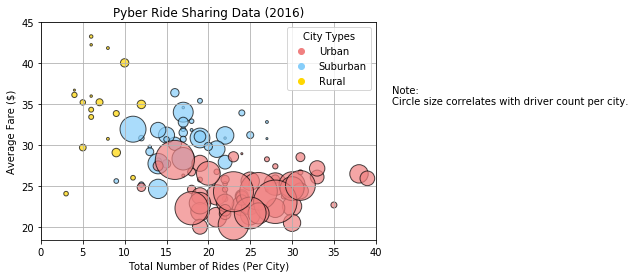

In [145]:
rural = rural_type['ride_id'], rural_type['fare']
suburban = suburban_type['ride_id'], suburban_type['fare']
urban = urban_type['ride_id'], urban_type['fare']

data = (rural, suburban, urban)
colors = ("gold", "lightskyblue", "lightcoral")
groups = ("Rural", "Suburban", "Urban") 
s = total_drivers_per_city['driver_count']

fig = plt.figure()
subp= fig.add_subplot(1, 1, 1)
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.xlim(0, 40)
plt.ylim(18.5, 45)

plt.plot([1], label='Urban', color='lightcoral', marker='o', linewidth=0)
plt.plot([1], label='Suburban', color='lightskyblue', marker='o', linewidth=0)
plt.plot([1], label='Rural', color='gold', marker='o', linewidth=0)
subp.plot([1, 2, 3])
subp.legend(['Urban', 'Suburban', 'Rural'])
plt.legend(title= 'City Types')

plt.text(42, 35,'Note:\nCircle size correlates with driver count per city.')

for data, colors, groups in zip(data, colors, groups):
    x, y = data
    subp.scatter(x, y, s=s, alpha=0.7, c=colors, edgecolors='black', label=groups)

plt.savefig("../data/Pyber_Bubble_Plot.png")
plt.show()

In [151]:
total_fares_by_type = total_fares_per_city.groupby('type')['fare'].sum()
total_rides_by_type = total_rides_per_city.groupby('type')['ride_id'].sum()
total_drivers_by_type = total_drivers_per_city.groupby('type')['driver_count'].sum()

4327.93

In [163]:
labels = ['Rural', 'Suburban', 'Urban']
sizes_fares = [total_fares_by_type[0], total_fares_by_type[1], total_fares_by_type[2]]
sizes_rides = [total_rides_by_type[0], total_rides_by_type[1], total_rides_by_type[2]]
sizes_drivers = [total_drivers_by_type[0], total_drivers_by_type[1], total_drivers_by_type[2]]
colors_pie = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

(-1.116703110300783,
 1.1972665181295887,
 -1.1123788195269562,
 1.1610996706073955)

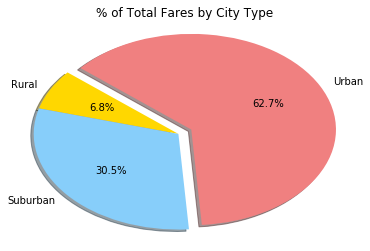

In [164]:
plt.pie(sizes_fares, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.axis('tight')

plt.savefig("../data/Fares_Pie_Chart.png")
plt.show()

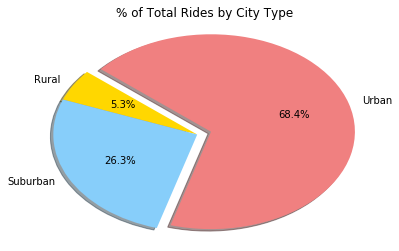

In [176]:
plt.pie(sizes_rides, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
plt.axis('tight')

plt.savefig("../data/Rides_Pie_Chart.png")
plt.show()

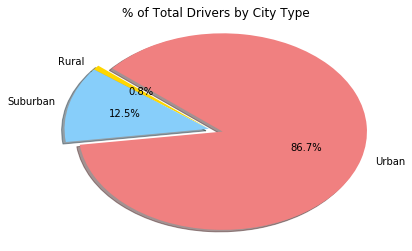

In [177]:
plt.pie(sizes_drivers, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
plt.axis('tight')

plt.savefig("../data/Drivers_Pie_Chart.png")
plt.show()